In [23]:
%matplotlib inline
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import sys
import time

In [2]:
pa = '/home/simonste/research/xrb/data/'
data_path = pa + 'input%s.txt'%'g'
gdata = XYLike.from_text_file("gdata", data_path)
gdata.assign_to_source(source_name = 'Xrb_gband_source')

data_path = pa +'input%s.txt'%'r'
rdata = XYLike.from_text_file("rdata", data_path)
rdata.assign_to_source(source_name = 'Xrb_rband_source')

data_path = pa +'input%s.txt'%'i'
idata = XYLike.from_text_file("idata", data_path)
idata.assign_to_source(source_name = 'Xrb_iband_source')

data_path = pa +'input%s.txt'%'z'
zdata = XYLike.from_text_file("zdata", data_path)
zdata.assign_to_source(source_name = 'Xrb_zband_source')

data_path = pa +'input%snew0102.txt'%'J'
Jdata = XYLike.from_text_file("Jdata", data_path)
Jdata.assign_to_source(source_name = 'Xrb_Jband_source')

data_path = pa +'input%snew0102.txt'%'H'
Hdata = XYLike.from_text_file("Hdata", data_path)
Hdata.assign_to_source(source_name = 'Xrb_Hband_source')

data_path = pa +'input%snew0102.txt'%'K'
Kdata = XYLike.from_text_file("Kdata", data_path)
Kdata.assign_to_source(source_name = 'Xrb_Kband_source')

data = DataList(gdata,rdata,idata,zdata,Jdata,Hdata,Kdata)



WARNING FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.


In [3]:
def ModeltoPointSource(band):
    mod = TemplateModel('Xrb_HSES_%s'%band,log_interp = False)
    mod.K.fix = True
    mod.scale.fix =True
    
    return PointSource('Xrb_%s_source'%band, 0, 0, spectral_shape = mod)

#modtest = TemplateModel('Xrb_HSES_gband',log_interp = False)
#modnewtest = modtest= + 0.2
##print modtest,modnewtest

filter_list = ['gband','rband','iband','zband','Jband','Hband','Kband']
point_source_list = ['ps_g','ps_r','ps_i','ps_z','ps_J','ps_H','ps_K']
PointSdict = {}
for h in range(len(filter_list)):
    PointSdict[point_source_list[h]] = ModeltoPointSource(filter_list[h])

my_model = Model(PointSdict['ps_g'],PointSdict['ps_r']
                 ,PointSdict['ps_i'],PointSdict['ps_z']
                 ,PointSdict['ps_J'],PointSdict['ps_H'],PointSdict['ps_K'])


In [4]:
allInklParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Inkl,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Inkl,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Inkl,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Inkl,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.Inkl,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Inkl]
allDtempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dtemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dtemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Dtemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Dtemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.Dtemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Dtemp]
allHSTempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSTemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSTemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSTemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSTemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.HSTemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSTemp]
allHSwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSWidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSWidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSWidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSWidth,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.HSWidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSWidth]
allHSAwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSAwidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.HSAwidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.HSAwidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.HSAwidth,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.HSAwidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.HSAwidth]
allT_secParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.T_sec,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.T_sec,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.T_sec,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.T_sec,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.T_sec,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.T_sec]
alldistfacParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.distfac,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.distfac,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.distfac,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.distfac,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.distfac,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.distfac]
allDsizeParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dsize,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dsize,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSES_zband.Dsize,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSES_Jband.Dsize,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSES_Hband.Dsize,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSES_Kband.Dsize]
my_model.link(allInklParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl)
my_model.link(allDtempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dtemp)
my_model.link(allHSTempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSTemp)
my_model.link(allHSwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSWidth)
my_model.link(allHSAwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSAwidth)
my_model.link(allT_secParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec)
my_model.link(alldistfacParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.distfac)
my_model.link(allDsizeParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dsize)

In [5]:
my_model.display()


WARNING FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



Model summary:
==============

                  N
Point sources     7
Extended sources  0
Particle sources  0

Free parameters (8):
--------------------

                             value min_value max_value unit
Xrb_gband_source...Inkl         69        60        78     
Xrb_gband_source...Dtemp      1700      1000      2400     
Xrb_gband_source...HSTemp     6000      3000      9000     
Xrb_gband_source...HSWidth      25         5        45     
Xrb_gband_source...HSAwidth  0.005     0.001     0.009     
Xrb_gband_source...T_sec      4200      4000      4400     
Xrb_gband_source...distfac       0        -1         1     
Xrb_gband_source...Dsize       0.8     0.725      0.99     

Fixed parameters (44):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (48):
----------------------

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Inkl
current value                                               69.0
function                                                    Line
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....
unit                                                            

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dtemp
current value                                             1700.0 
function                                                    Line 
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband.... 
unit                                                             

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSTemp
current value                                             6000.0  
function                                                    Line  
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....  
unit                                                              

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSWidth
current value                                               25.0   
function                                                    Line   
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....   
unit                                                               

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.HSAwidth
current value                                              0.005    
function                                                    Line    
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....    
unit                                                                

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.T_sec
current value                                             4200.0 
function                                                    Line 
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband.... 
unit                                                             

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.distfac
current value                                                0.0   
function                                                    Line   
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....   
unit                                                               

              Xrb_rband_source.spectrum.main.Xrb_HSES_rband.Dsize
current value                                                0.8 
function                                                    Line 
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband.... 
unit                                                             

              Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Inkl
current value                                               69.0
function                                                    Line
linked to      Xrb_gband_source.spectrum.main.Xrb_HSES_gband....
unit                                                            

              Xrb_iband_source.spectrum.main.Xrb_HSES_iband.Dtemp
current value                                             1700.0 
function                        

In [6]:
def drawfromprior(seed,low,high,size):
    np.random.seed(seed)
    return np.random.uniform(low,high,size)

In [7]:
size = 1000
Inklprior = drawfromprior(70,60,78,size)
Dtempprior = drawfromprior(1500,1000,2400,size)
HSTempprior = drawfromprior(4000,3000,9000,size)
HSWidthprior = drawfromprior(25,5,45,size)
HSAwidthprior = 0.005*np.ones(size)
T_secprior = drawfromprior(4200,4000,4400,size)
distfacprior = drawfromprior(0,-1,1,size)
Dsizeprior = drawfromprior(1,0.725,0.99,size)
priorparams = np.stack((Inklprior,Dtempprior,HSTempprior,HSWidthprior,HSAwidthprior,T_secprior,distfacprior,Dsizeprior),axis =1)


In [17]:
def  compplot2(params,ax,i,bands_data,band):
    phases = np.arange(0,1.01,0.01)
    #bands_data = [gdata,rdata,idata,zdata,Jdata,Hdata,Kdata]
    #
    #lColor = ['goldenrod']
    lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Inkl.value = params[0]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dtemp.value  =params[1]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSTemp.value =params[2]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSWidth.value = params[3]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.HSAwidth.value  = params[4]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.T_sec.value = params[5]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.distfac.value  =params[6]
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSES_gband.Dsize.value  =params[7]
    
    
    
    
    
    #modlist = [modelg,modelr,modeli,modelz,modelJ,modelH,modelK]
    for co,(source_name, point_source) in enumerate(my_model.point_sources.iteritems()):
        if source_name == band:
            ax.plot(phases,point_source.spectrum.main.shape(phases),
                '-',c = lColor[co],alpha=0.2,lw=.5 ,label = 'Model')#label= "%s" %(point_source))
        else:
            continue
                
        
        

    co = 0
    if i == 0:
        for band in bands_data:
            ax.errorbar(band.x,band.y,yerr = band.yerr, fmt ='.', label = 'GROND '  + band.get_name()[0] +' data',c = 'black')
            co+=1

In [31]:
def plotppc(band,bands_data,band_ind):
    import time
    time_start = time.time()
    phases = np.arange(0,1.01,0.01)
    fig, ax = plt.subplots(figsize=(12,7))
    lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
    with use_astromodels_memoization(False):
        for  ev,parameterset in enumerate(priorparams): 

            #print parameterset
            compplot2(parameterset,ax,ev,bands_data,band)
    
    
    ax.set_xlabel(r"Phase $\theta$",fontsize =20)
    handles,labels = ax.get_legend_handles_labels()
    handles_up = [Line2D([0],[0],color = lColor[band_ind]),handles[-1]]
    ax.legend(handles_up,(labels[0],labels[-1]),fontsize =20,loc = 1)
    ax.set_ylabel("Magnitude [AB]",fontsize =20)
    ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
    plt.gca().invert_yaxis()
    fig.savefig('Plots/PPC%snew.png'%band)
    time_stop = time.time()
    print ('took %s seconds'%(time_stop-time_start))

took 765.434633017 seconds
took 737.304089069 seconds
took 767.074615955 seconds
took 864.369821072 seconds
took 861.403890133 seconds
took 828.599334002 seconds
took 847.700755119 seconds


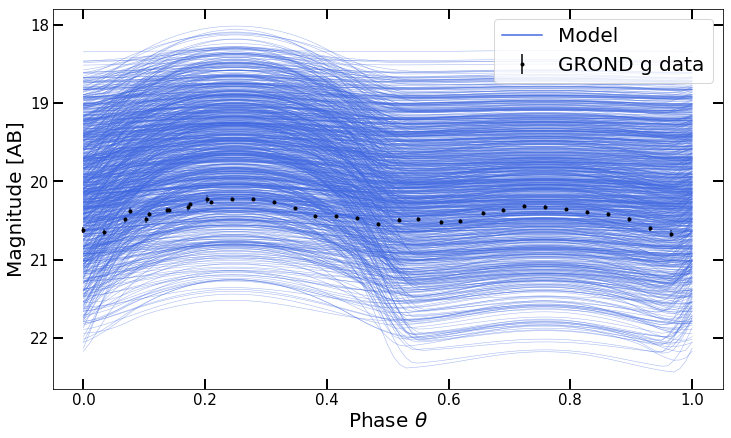

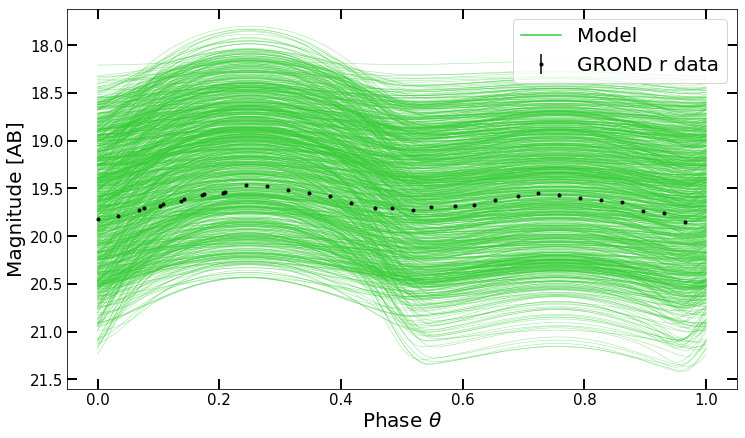

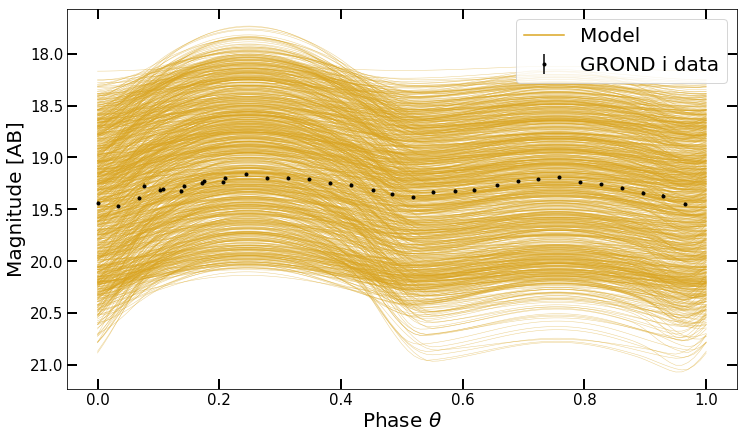

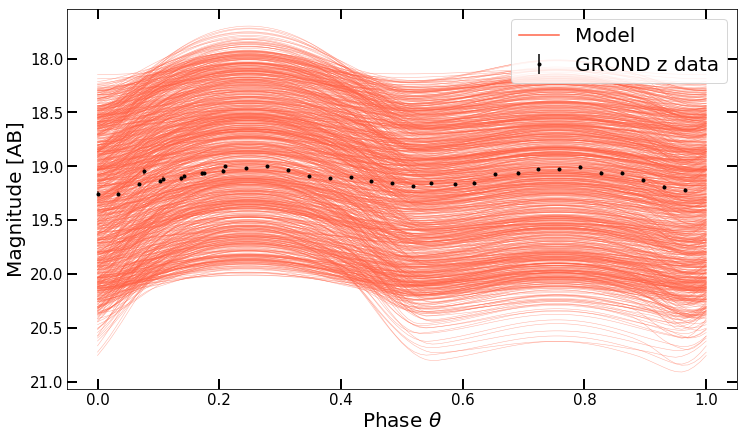

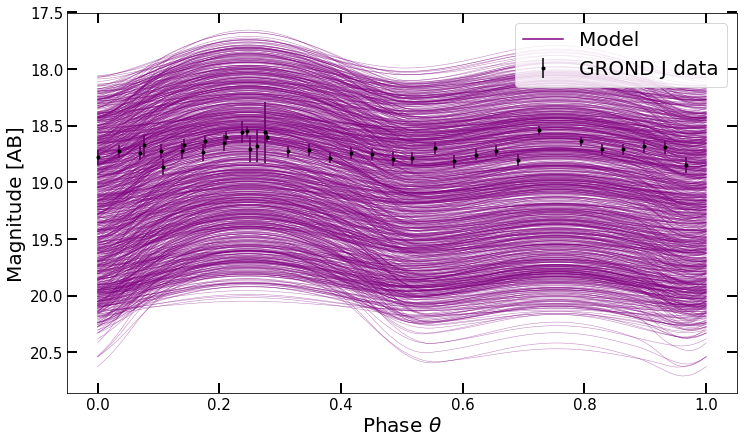

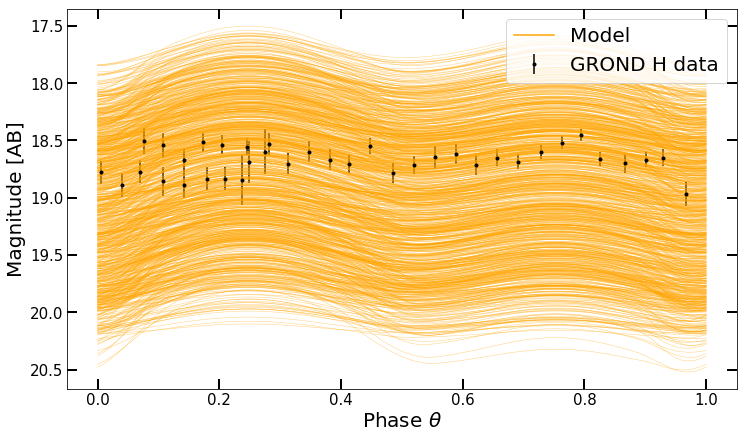

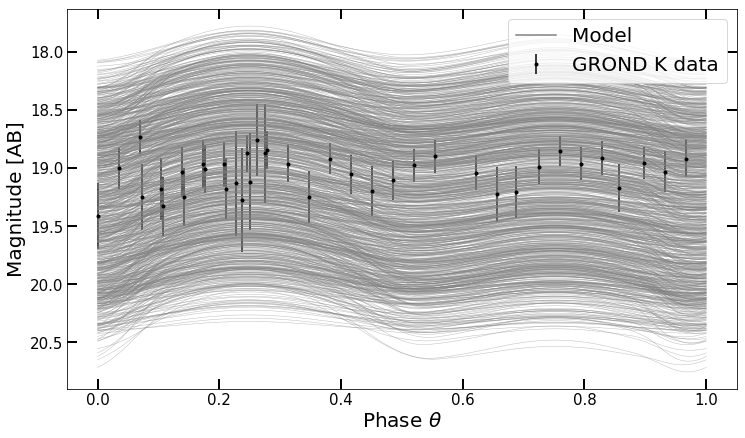

In [32]:
plotppc("Xrb_gband_source",[gdata],0)
plotppc("Xrb_rband_source",[rdata],1)
plotppc("Xrb_iband_source",[idata],2)
plotppc("Xrb_zband_source",[zdata],3)
plotppc("Xrb_Jband_source",[Jdata],4)
plotppc("Xrb_Hband_source",[Hdata],5)
plotppc("Xrb_Kband_source",[Kdata],6)

took 724.077520847 seconds


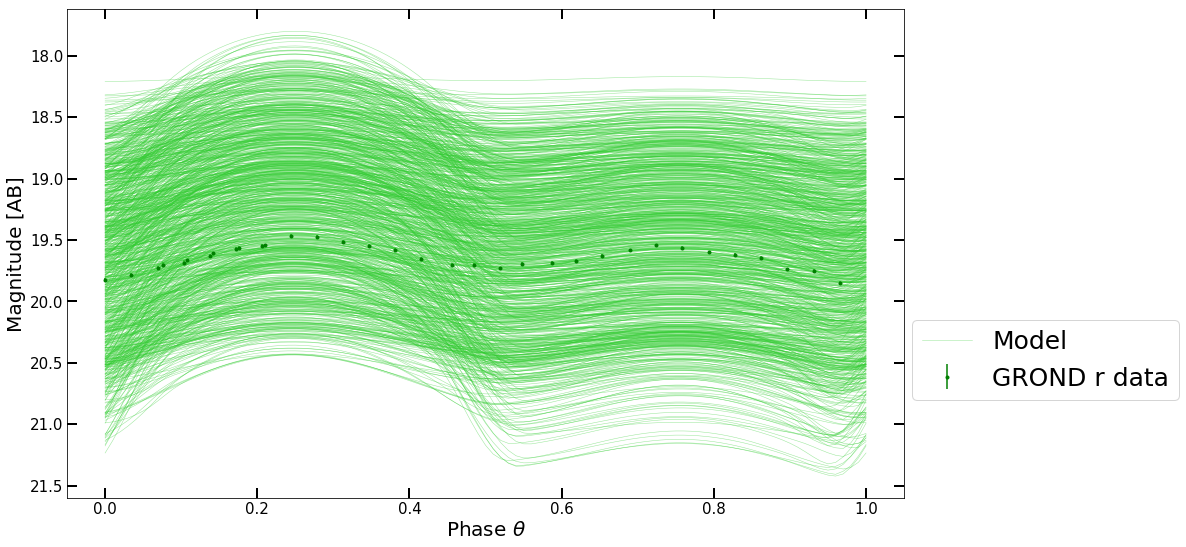

In [36]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
handles,labels = ax.get_legend_handles_labels()
ax.legend((handles[0],handles[-1]),(labels[0],labels[-1]),fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))

took 724.049892187 seconds


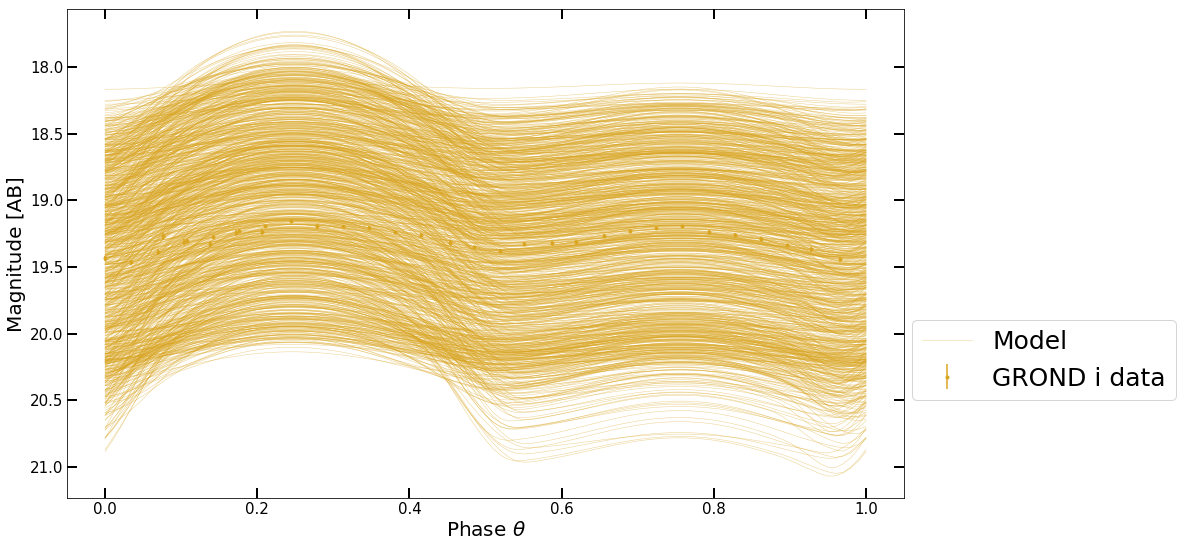

In [39]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
handles,labels = ax.get_legend_handles_labels()
ax.legend((handles[0],handles[-1]),(labels[0],labels[-1]),fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))

took 902.096121073 seconds


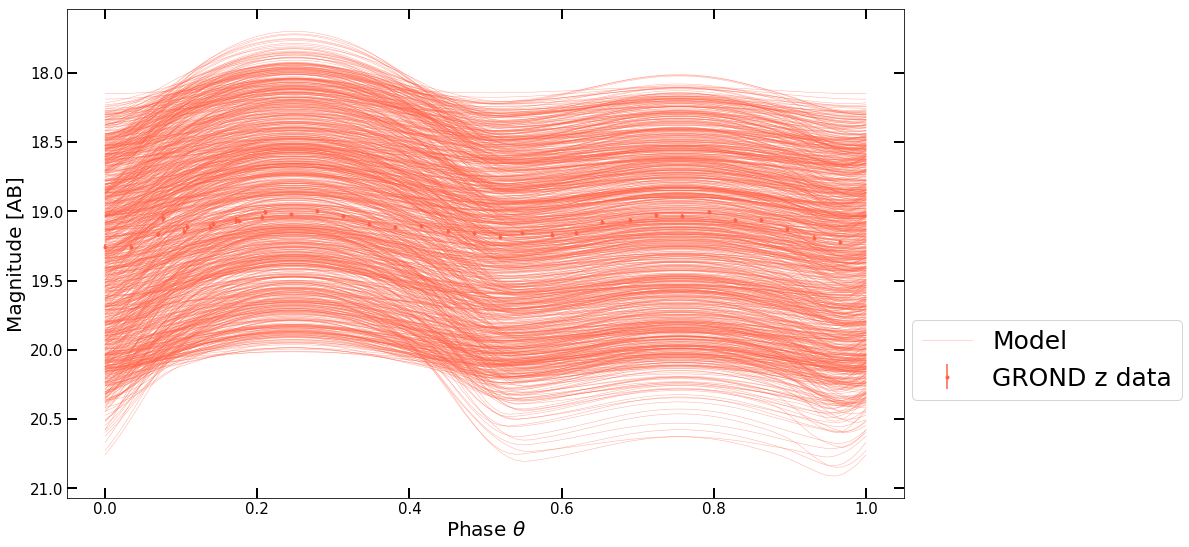

In [50]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
handles,labels = ax.get_legend_handles_labels()
ax.legend((handles[0],handles[-1]),(labels[0],labels[-1]),fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))

took 725.520400047 seconds


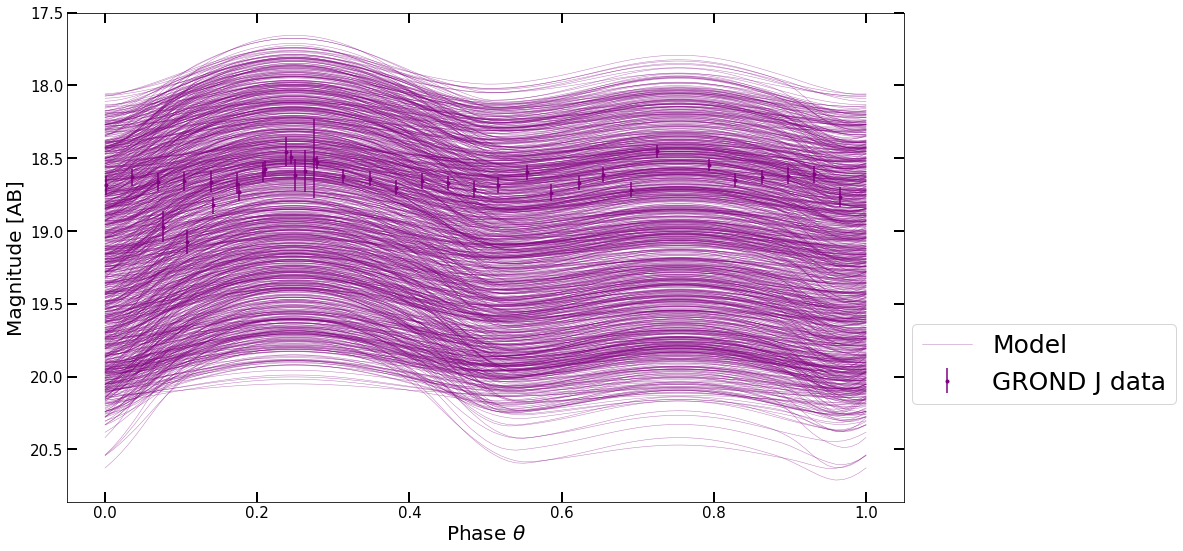

In [47]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
handles,labels = ax.get_legend_handles_labels()
ax.legend((handles[0],handles[-1]),(labels[0],labels[-1]),fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))

took 901.593753099 seconds


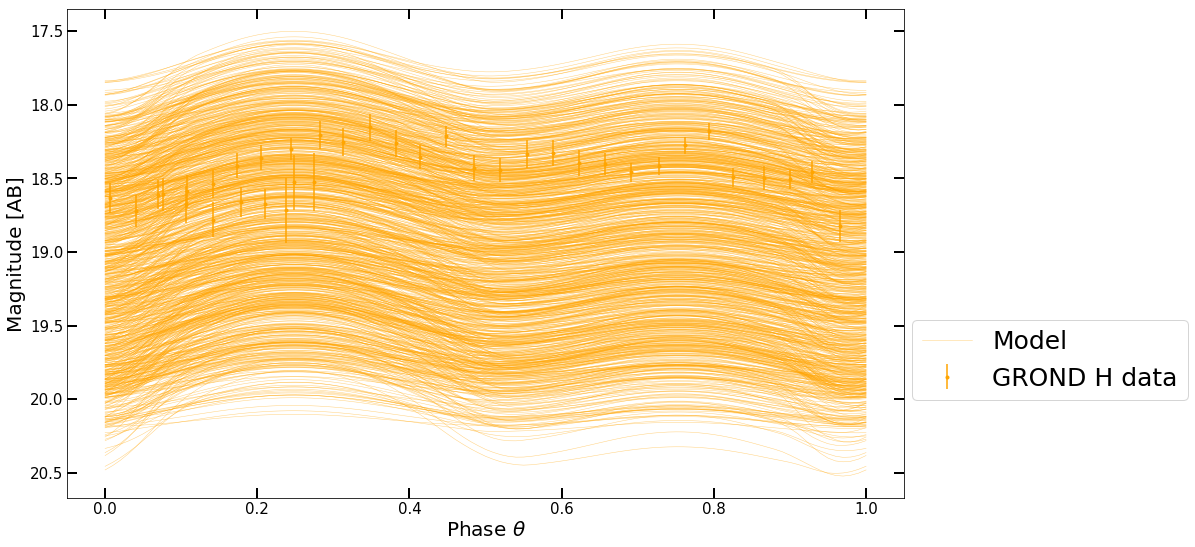

In [52]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
handles,labels = ax.get_legend_handles_labels()
ax.legend((handles[0],handles[-1]),(labels[0],labels[-1]),fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))

took 722.565474033 seconds


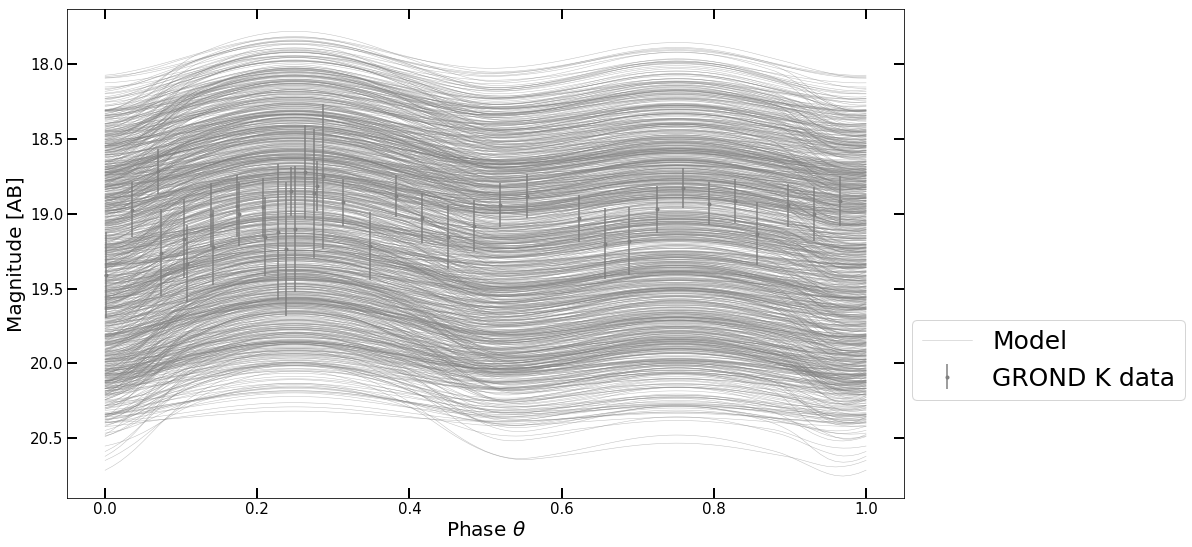

In [54]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$",fontsize =20)
handles,labels = ax.get_legend_handles_labels()
ax.legend((handles[0],handles[-1]),(labels[0],labels[-1]),fontsize =25,loc = (1.01,0.2))
ax.set_ylabel("Magnitude [AB]",fontsize =20)
ax.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))

took 1419.33980417 seconds


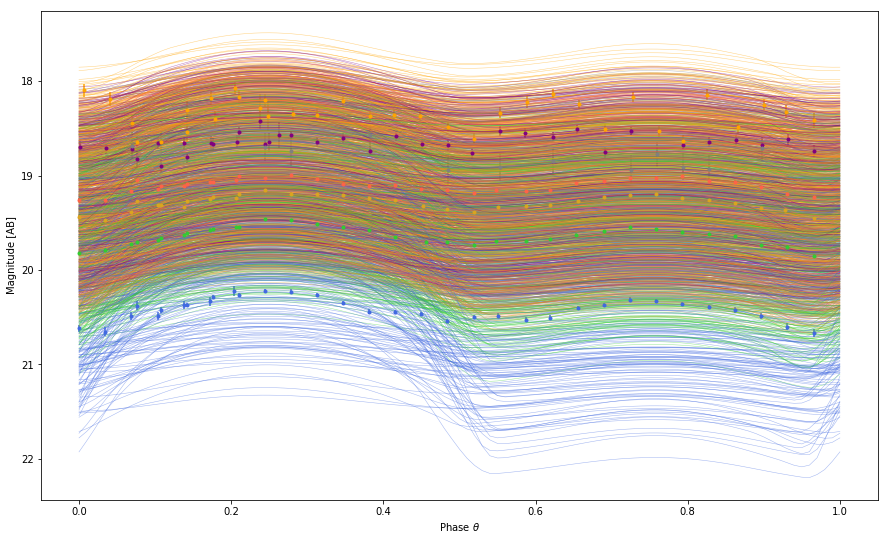

In [47]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams[:300]): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$")
#ax.legend()
ax.set_ylabel("Magnitude [AB]")
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))

took 2383.69567704 seconds


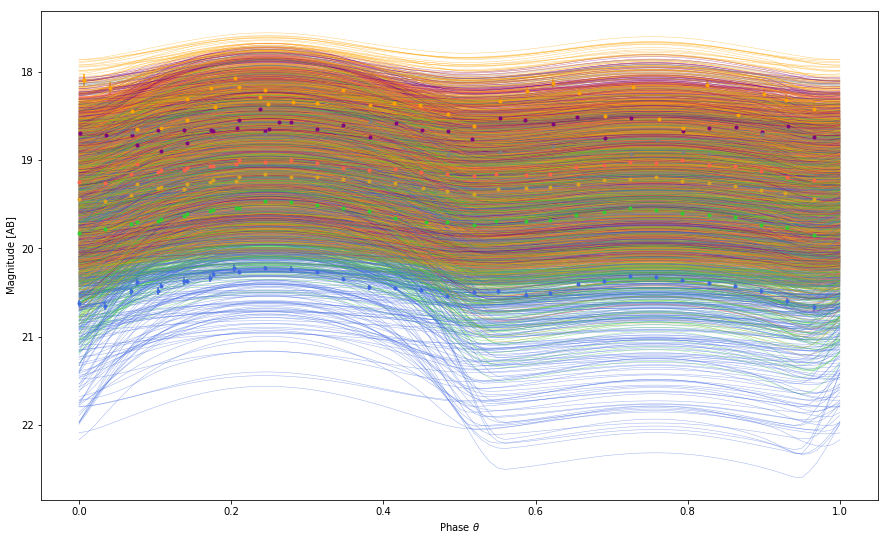

In [48]:
import time
time_start = time.time()
phases = np.arange(0,1.01,0.01)
fig, ax = plt.subplots(figsize=(15,9))
#lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
with use_astromodels_memoization(False):
    for  ev,parameterset in enumerate(priorparams[300:800]): 

            #print parameterset
        compplot2(parameterset,ax,ev)
    
    
ax.set_xlabel(r"Phase $\theta$")
#ax.legend()
ax.set_ylabel("Magnitude [AB]")
plt.gca().invert_yaxis()
time_stop = time.time()
print ('took %s seconds'%(time_stop-time_start))